# Анализ логов клиентских данных


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')

In [3]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [4]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [5]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


Какой клиент совершил больше всего успешных операций? (success == True)  
С какой платформы осуществляется наибольшее количество успешных операций?  
Какую платформу предпочитают премиумные клиенты?  
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)  
Постройте график распределения числа успешных операций  
Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста  
Клиенты какого возраста совершили наибольшее количество успешных действий?

Проверка размера таблицы, типов переменных, наличия пропущенных значений, описательная статистика датафрейма user_data

In [7]:
user_data.shape

(2954, 3)

In [9]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [10]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [11]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

Проверка размера таблицы, типов переменных, наличия пропущенных значений, описательная статистика датафрейма logs

In [16]:
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [15]:
logs.shape

(4500, 4)

In [12]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [13]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [14]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

Какой клиент совершил больше всего успешных операций? (success == True)

In [24]:
success_number = logs.query('success == True') \
                    .groupby('client', as_index = False) \
                    .agg({'platform': 'count'}) \
                    .rename(columns = {'platform': 'success_number'}) \
                    .sort_values('success_number', ascending = False) 

In [30]:
success_number.head(10)

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41
1826,64064,40


In [25]:
maximum_success = success_number.success_number.max()
maximum_success

41

In [26]:
successful_clients = success_number.query('success_number == @maximum_success') \
              .sort_values('client') \
              .client \
              .tolist()

successful_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [27]:
#переводим список в строку
for client in successful_clients:
    print(client, end=', ')

12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584, 

In [29]:
', '.join([str(client) for client in successful_clients])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

С какой платформы осуществляется наибольшее количество успешных операций?

In [31]:
logs.query('success == True').platform.value_counts().idxmax()

'phone'

Какую платформу предпочитают премиумные клиенты?

In [32]:
user_logs = user_data.merge(logs, on = 'client')
user_logs.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [33]:
user_logs.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

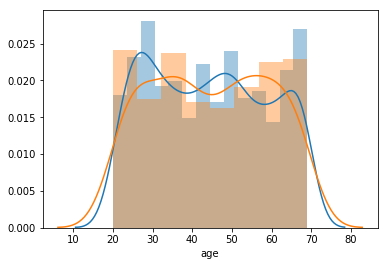

In [34]:
sns.distplot(user_logs.query('premium == False').age)
sns.distplot(user_logs.query('premium == True').age)

Постройте график распределения числа успешных операций

In [53]:
client_vs_success_number = user_logs \
                            .groupby('client', as_index = False) \
                            .agg({'success': 'sum'}) \
                            .sort_values('success', ascending = False)

In [54]:
client_vs_success_number

,client,success
2416,82563,41.0
1791,61468,41.0
1792,61473,41.0
1521,52870,41.0
2723,92584,41.0
2306,78349,41.0
345,12179,41.0
1033,36165,41.0
813,28719,41.0
1862,64064,40.0


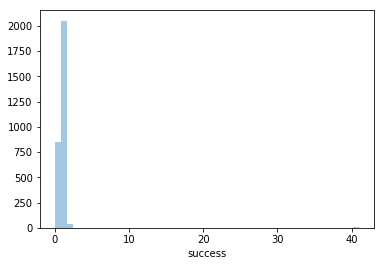

In [59]:
sns.distplot(client_vs_success_number.success, kde = False)

In [56]:
client_vs_success_number.success.value_counts()

1.0     2051
0.0      850
2.0       42
41.0       9
3.0        1
40.0       1
Name: success, dtype: int64

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста.  
Клиенты какого возраста совершили наибольшее количество успешных действий?

In [62]:
computer_success = user_logs.query('platform == "computer" and success == True')

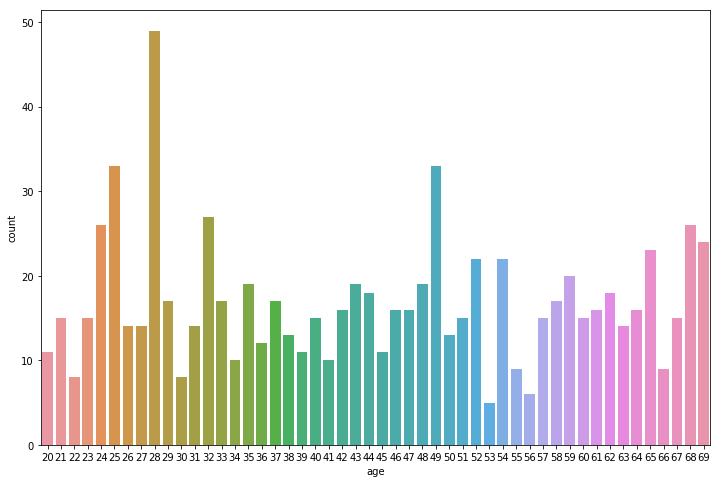

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(computer_success.age)